# Autonomous Vehicle Sentiment Analysis
### Final Project for DTSA 5506: Data Mining Pipeline Project
#### University of Colorado, Boulder - Master of Science in Data Science

**By:** Andrea Francu  
**Version:** 1.0  
**Date:** October 2, 2023

This project takes a look at the various sentiment surrounding autonomous vehicles (AVs). This rapidly progressing technology is gaining lots of traction and attention in the media, both positive and negative. Using natural language processing (NLP) and web scraping tools, this project uses various reddit posts about AVs to analyze sentiment surrounding this technology, as well as model common topics discussed alongside AVs.

In [ ]:
import praw
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib.font_manager import FontProperties
from wordcloud import WordCloud

In [ ]:
# enter credentials to access reddit posts
reddit = praw.Reddit(username = "Large-Candle-570",
                     password = "datascienceproject",
                     client_id = "HV2rBGwwOMaRO_r0lOYtBw",
                     client_secret = "IejCRqKRR6gAEWfenbDANz-hsesI2g",
                     user_agent = "praw_scraper_1.0"
)

In [3]:
# search for specific subreddit to put into dataframe
subreddit_name = "AutonomousVehicles"
subreddit = reddit.subreddit(subreddit_name)

df_AV = pd.DataFrame() 

In [4]:
# create lists for attributes we want to look at
titles=[]
scores=[]
ids=[]

In [5]:
# loop through posts and add attributes
for submission in subreddit.top():
    titles.append(submission.title)
    scores.append(submission.score) #upvotes
    ids.append(submission.id)

In [6]:
# enter attribute values into the dataframe
df_AV['Post'] = titles
df_AV['Id'] = ids
df_AV['Upvotes'] = scores #upvotes

df_AV.head()

,Post,Id,Upvotes
0,This parking robot can park your car for you. ...,uv6nwi,53
1,FSD Beta v10.3 Release Notes,qenl0g,52
2,I just destroyed RealDanODowd’s ad with a card...,wlrczx,36
3,"Chuck Cook safety ""tutorial"" for upcoming Tesl...",pu20j9,32
4,"He thinks it autonomous, but it's possible tha...",125vzry,31


In [7]:
#TextBlob
# loop through posts in dataframe and add sentiment attribute using TextBlob
# this gives each post a value between -1 (negative sentiment) and 1 (positive sentiment)
df_AV['TextBlob Sentiment'] = 0.0
df_AV['TextBlob Subjectivity'] = 0.0

for i in range(0, 100):
    blob = TextBlob(df_AV['Post'][i])
    df_AV.loc[i, 'TextBlob Sentiment'] = blob.sentiment.polarity
    df_AV.loc[i, 'TextBlob Subjectivity'] = blob.sentiment.subjectivity
    
df_AV

,Post,Id,Upvotes,TextBlob Sentiment,TextBlob Subjectivity
0,This parking robot can park your car for you. ...,uv6nwi,53,0.450000,0.600000
1,FSD Beta v10.3 Release Notes,qenl0g,52,0.000000,0.000000
2,I just destroyed RealDanODowd’s ad with a card...,wlrczx,36,0.000000,1.000000
3,"Chuck Cook safety ""tutorial"" for upcoming Tesl...",pu20j9,32,0.000000,0.000000
4,"He thinks it autonomous, but it's possible tha...",125vzry,31,0.091667,0.691667
...,...,...,...,...,...
95,Question from the infrastructure support side,phwz2o,10,0.000000,0.000000
96,Motional and Hyundai unveil IONIQ 5 robotaxi. ...,pf2ldc,10,0.000000,0.000000
97,‘This Experience May Feel Futuristic’: Three R...,15z4v7x,8,0.000000,0.000000
98,Autonomous rover built by student!,10x8z6p,8,0.500000,0.700000


In [8]:
df_AV['NLTK Sentiment'] = 0.0

analyzer = SentimentIntensityAnalyzer()
for i in range(0, 100):
    text = df_AV['Post'][i]
    sentiment_scores = analyzer.polarity_scores(text)
        
    df_AV.loc[i, 'VADER Sentiment'] = sentiment_scores['compound']
    
df_AV

,Post,Id,Upvotes,TextBlob Sentiment,TextBlob Subjectivity,NLTK Sentiment,VADER Sentiment
0,This parking robot can park your car for you. ...,uv6nwi,53,0.450000,0.600000,0.0,0.5994
1,FSD Beta v10.3 Release Notes,qenl0g,52,0.000000,0.000000,0.0,0.0000
2,I just destroyed RealDanODowd’s ad with a card...,wlrczx,36,0.000000,1.000000,0.0,-0.2732
3,"Chuck Cook safety ""tutorial"" for upcoming Tesl...",pu20j9,32,0.000000,0.000000,0.0,0.4215
4,"He thinks it autonomous, but it's possible tha...",125vzry,31,0.091667,0.691667,0.0,0.0000
...,...,...,...,...,...,...,...
95,Question from the infrastructure support side,phwz2o,10,0.000000,0.000000,0.0,0.4019
96,Motional and Hyundai unveil IONIQ 5 robotaxi. ...,pf2ldc,10,0.000000,0.000000,0.0,0.0000
97,‘This Experience May Feel Futuristic’: Three R...,15z4v7x,8,0.000000,0.000000,0.0,0.0000
98,Autonomous rover built by student!,10x8z6p,8,0.500000,0.700000,0.0,0.0000


In [9]:
df_sent = pd.DataFrame()
df_sent1 = pd.DataFrame()
df_sent2 = pd.DataFrame()
df_zeros = pd.DataFrame()
df_sent3 = pd.DataFrame()

In [10]:
sub = []
textBlobSent = []
textBlobSubj = []
NLTK = []

sub1 = []
textBlobSent1 = []
textBlobSubj1 = []
NLTK1 = []

sub2 = []
textBlobSent2 = []
textBlobSubj2 = []
NLTK2 = []

In [11]:
sub.append('AutonomousVehicles')
textBlobSent.append(df_AV['TextBlob Sentiment'].mean())
textBlobSubj.append(df_AV['TextBlob Subjectivity'].mean())
NLTK.append(df_AV['VADER Sentiment'].mean())

In [12]:
subreddit_name = "SelfDrivingCars"
subreddit = reddit.subreddit(subreddit_name)

df_SDC = pd.DataFrame() 

titles=[]
scores=[]
ids=[]

for submission in subreddit.top():
    titles.append(submission.title)
    scores.append(submission.score) #upvotes
    ids.append(submission.id)
    
df_SDC['Post'] = titles
df_SDC['Id'] = ids
df_SDC['Upvotes'] = scores #upvotes

df_SDC['TextBlob Sentiment'] = 0.0
df_SDC['TextBlob Subjectivity'] = 0.0

for i in range(0, 100):
    blob = TextBlob(df_SDC['Post'][i])
    df_SDC.loc[i, 'TextBlob Sentiment'] = blob.sentiment.polarity
    df_SDC.loc[i, 'TextBlob Subjectivity'] = blob.sentiment.subjectivity

df_SDC['VADER Sentiment'] = 0.0

analyzer = SentimentIntensityAnalyzer()
for i in range(0, 100):
    text = df_SDC['Post'][i]
    sentiment_scores = analyzer.polarity_scores(text)
        
    df_SDC.loc[i, 'VADER Sentiment'] = sentiment_scores['compound']


In [13]:
df_SDC

,Post,Id,Upvotes,TextBlob Sentiment,TextBlob Subjectivity,VADER Sentiment
0,"Don't name your Store ""Stop"" 🤣",k56za3,773,0.000000,0.000000,0.0000
1,Delivery robot met driverless car on intersection,pcjw20,749,0.000000,0.000000,0.0000
2,"""Elon’s tweet does not match engineering reali...",n6nsmt,689,0.000000,0.000000,0.0000
3,Waymo 5th Generation Lidar,q3vtww,648,0.000000,0.000000,0.0000
4,False positive caused by ad on truck,edsoz4,533,-0.086364,0.572727,0.5574
...,...,...,...,...,...,...
95,Waymo is opening its fully driverless service ...,j7fpz5,208,0.025000,0.283333,0.0000
96,Openpilot driving through the hills (and an in...,fejbij,207,0.000000,0.000000,0.0000
97,Zoox full 1-hour autonomous drive in San Franc...,g3a35t,210,0.375000,0.625000,0.0000
98,Lexus with manufacturer plates and Velodyne li...,cljd39,204,0.000000,0.000000,0.0000


In [14]:
sub.append('SelfDrivingCars')
textBlobSent.append(df_SDC['TextBlob Sentiment'].mean())
textBlobSubj.append(df_SDC['TextBlob Subjectivity'].mean())
NLTK.append(df_SDC['VADER Sentiment'].mean())

In [15]:
subreddit_name = "SelfDrivingCarsLie"
subreddit = reddit.subreddit(subreddit_name)

df_SDCL = pd.DataFrame() 

titles=[]
scores=[]
ids=[]

for submission in subreddit.top():
    titles.append(submission.title)
    scores.append(submission.score) #upvotes
    ids.append(submission.id)
    
df_SDCL['Post'] = titles
df_SDCL['Id'] = ids
df_SDCL['Upvotes'] = scores #upvotes

df_SDCL['TextBlob Sentiment'] = 0.0
df_SDCL['TextBlob Subjectivity'] = 0.0

for i in range(0, 100):
    blob = TextBlob(df_SDCL['Post'][i])
    df_SDCL.loc[i, 'TextBlob Sentiment'] = blob.sentiment.polarity
    df_SDCL.loc[i, 'TextBlob Subjectivity'] = blob.sentiment.subjectivity

df_SDCL['VADER Sentiment'] = 0.0

analyzer = SentimentIntensityAnalyzer()
for i in range(0, 100):
    text = df_SDCL['Post'][i]
    sentiment_scores = analyzer.polarity_scores(text)
        
    df_SDCL.loc[i, 'VADER Sentiment'] = sentiment_scores['compound']
    
sub.append('SelfDrivingCarsLie')
textBlobSent.append(df_SDCL['TextBlob Sentiment'].mean())
textBlobSubj.append(df_SDCL['TextBlob Subjectivity'].mean())
NLTK.append(df_SDCL['VADER Sentiment'].mean())

In [16]:
df_SDCL

,Post,Id,Upvotes,TextBlob Sentiment,TextBlob Subjectivity,VADER Sentiment
0,"Amazon Prime Video new sci-fi comedy ""Upload"" ...",ggkiw5,158,0.068182,0.289773,-0.2960
1,Holy shit,va57sa,140,-0.200000,0.800000,-0.5574
2,Another mishap that could have been prevented,hruane,111,0.000000,0.000000,0.0258
3,"Tesla is sued by family of man, 44, who was ru...",gb0h5a,102,-0.087500,0.383333,-0.9231
4,One of my favorite moments from Top Gear...Mer...,j0iei3,97,0.166667,0.600000,0.0772
...,...,...,...,...,...,...
95,Billboard Confuses Tesla Autopilot Reminds Why...,ms9am8,27,0.200000,0.500000,-0.5283
96,Elon Musk says Tesla's Full Self-Driving tech ...,l6qzlv,26,0.033333,0.850000,0.4404
97,Do Tesla travails suggest that self-driving te...,jse9v2,26,-0.231250,0.593750,-0.8812
98,69% UK adults NOT comfortable with hands-free ...,ie0usx,26,-0.200000,0.800000,-0.4023


In [17]:
subreddit_name = "cars"
subreddit = reddit.subreddit(subreddit_name)

df_cars = pd.DataFrame() 

titles=[]
scores=[]
ids=[]

for submission in subreddit.top():
    titles.append(submission.title)
    scores.append(submission.score) #upvotes
    ids.append(submission.id)
    
df_cars['Post'] = titles
df_cars['Id'] = ids
df_cars['Upvotes'] = scores #upvotes

df_cars['TextBlob Sentiment'] = 0.0
df_cars['TextBlob Subjectivity'] = 0.0

for i in range(0, 100):
    blob = TextBlob(df_cars['Post'][i])
    df_cars.loc[i, 'TextBlob Sentiment'] = blob.sentiment.polarity
    df_cars.loc[i, 'TextBlob Subjectivity'] = blob.sentiment.subjectivity

df_cars['VADER Sentiment'] = 0.0

analyzer = SentimentIntensityAnalyzer()
for i in range(0, 100):
    text = df_cars['Post'][i]
    sentiment_scores = analyzer.polarity_scores(text)
        
    df_SDCL.loc[i, 'VADER Sentiment'] = sentiment_scores['compound']
    
sub.append('Cars')
textBlobSent.append(df_cars['TextBlob Sentiment'].mean())
textBlobSubj.append(df_cars['TextBlob Subjectivity'].mean())
NLTK.append(df_cars['VADER Sentiment'].mean())

In [18]:
df_cars

,Post,Id,Upvotes,TextBlob Sentiment,TextBlob Subjectivity,VADER Sentiment
0,Will pee damage tires?,54z4f7,44890,0.00,0.000000,0.0
1,Just accidentally put diesel in my car. How fu...,7nwgqs,39482,-0.60,0.700000,0.0
2,Will my husband divorce me if I dehydrate toma...,m1zjrv,25358,0.00,0.000000,0.0
3,Nevada Passes Law Making It Illegal To Drive S...,6r4rfd,24959,-0.20,0.500000,0.0
4,Can automaker please stop replacing buttons wi...,ki2k58,23941,0.00,0.000000,0.0
...,...,...,...,...,...,...
95,“It’s only $25 to fill up” is the worst way to...,hs6i0s,7301,-0.10,0.866667,0.0
96,Toyota confirms their cars won't be present in...,ct31rs,7290,-0.10,0.450000,0.0
97,Tesla Model Y Owners Find Cooling System Cobbl...,ipi89a,7227,-0.50,1.000000,0.0
98,The ‘Slam’ of Your Car Door Is Fake: Car doors...,icjzyp,7202,0.22,0.540000,0.0


In [19]:
subreddit_name = "SelfdrivingcarsWCGW"
subreddit = reddit.subreddit(subreddit_name)

df_WCGW = pd.DataFrame() 

titles=[]
scores=[]
ids=[]

for submission in subreddit.top():
    titles.append(submission.title)
    scores.append(submission.score) #upvotes
    ids.append(submission.id)
    
df_WCGW['Post'] = titles
df_WCGW['Id'] = ids
df_WCGW['Upvotes'] = scores #upvotes

df_WCGW['TextBlob Sentiment'] = 0.0
df_WCGW['TextBlob Subjectivity'] = 0.0

for i in range(0, 3):
    blob = TextBlob(df_WCGW['Post'][i])
    df_WCGW.loc[i, 'TextBlob Sentiment'] = blob.sentiment.polarity
    df_WCGW.loc[i, 'TextBlob Subjectivity'] = blob.sentiment.subjectivity

df_WCGW['VADER Sentiment'] = 0.0

analyzer = SentimentIntensityAnalyzer()
for i in range(0, 3):
    text = df_WCGW['Post'][i]
    sentiment_scores = analyzer.polarity_scores(text)
        
    df_WCGW.loc[i, 'VADER Sentiment'] = sentiment_scores['compound']
    
sub.append('SelfdrivingcarsWCGW')
textBlobSent.append(df_WCGW['TextBlob Sentiment'].mean())
textBlobSubj.append(df_WCGW['TextBlob Subjectivity'].mean())
NLTK.append(df_WCGW['VADER Sentiment'].mean())

In [20]:
df_WCGW

,Post,Id,Upvotes,TextBlob Sentiment,TextBlob Subjectivity,VADER Sentiment
0,"How the Self Driving Car thing might work, in ...",43qt8s,3,-0.343750,0.700,-0.4767
1,The Future has arrived and it's pretty incredi...,gjhhnv,2,0.383333,0.675,0.4939
2,Problem,b1axyh,1,0.000000,0.000,-0.4019


In [21]:
df_sent['Subreddit Name'] = sub
df_sent['textBlob Sentiment'] = textBlobSent
df_sent['textBlob Subjectivity'] = textBlobSubj
df_sent['VADER Sentiment'] = NLTK
df_sent = df_sent.round(3)

In [22]:
df_sent

,Subreddit Name,textBlob Sentiment,textBlob Subjectivity,VADER Sentiment
0,AutonomousVehicles,0.156,0.350,0.054
1,SelfDrivingCars,0.061,0.255,0.005
2,SelfDrivingCarsLie,-0.002,0.378,-0.115
3,Cars,0.031,0.285,0.000
4,SelfdrivingcarsWCGW,0.013,0.458,-0.128


In [23]:
subreddit_name = "teslamotors"
subreddit = reddit.subreddit(subreddit_name)

df_tesla = pd.DataFrame() 

titles=[]
scores=[]
ids=[]

for submission in subreddit.top():
    titles.append(submission.title)
    scores.append(submission.score) #upvotes
    ids.append(submission.id)
    
df_tesla['Post'] = titles
df_tesla['Id'] = ids
df_tesla['Upvotes'] = scores #upvotes

df_tesla['TextBlob Sentiment'] = 0.0
df_tesla['TextBlob Subjectivity'] = 0.0

for i in range(0, 100):
    blob = TextBlob(df_tesla['Post'][i])
    df_tesla.loc[i, 'TextBlob Sentiment'] = blob.sentiment.polarity
    df_tesla.loc[i, 'TextBlob Subjectivity'] = blob.sentiment.subjectivity

df_tesla['VADER Sentiment'] = 0.0

analyzer = SentimentIntensityAnalyzer()
for i in range(0, 100):
    text = df_tesla['Post'][i]
    sentiment_scores = analyzer.polarity_scores(text)
        
    df_tesla.loc[i, 'VADER Sentiment'] = sentiment_scores['compound']
    
sub1.append('Tesla')
textBlobSent1.append(df_tesla['TextBlob Sentiment'].mean())
textBlobSubj1.append(df_tesla['TextBlob Subjectivity'].mean())
NLTK1.append(df_tesla['VADER Sentiment'].mean())

In [24]:
subreddit_name = "Ford"
subreddit = reddit.subreddit(subreddit_name)

df_ford = pd.DataFrame() 

titles=[]
scores=[]
ids=[]

for submission in subreddit.top():
    titles.append(submission.title)
    scores.append(submission.score) #upvotes
    ids.append(submission.id)
    
df_ford['Post'] = titles
df_ford['Id'] = ids
df_ford['Upvotes'] = scores #upvotes

df_ford['TextBlob Sentiment'] = 0.0
df_ford['TextBlob Subjectivity'] = 0.0

for i in range(0, 100):
    blob = TextBlob(df_ford['Post'][i])
    df_ford.loc[i, 'TextBlob Sentiment'] = blob.sentiment.polarity
    df_ford.loc[i, 'TextBlob Subjectivity'] = blob.sentiment.subjectivity

df_ford['VADER Sentiment'] = 0.0

analyzer = SentimentIntensityAnalyzer()
for i in range(0, 100):
    text = df_ford['Post'][i]
    sentiment_scores = analyzer.polarity_scores(text)
        
    df_ford.loc[i, 'VADER Sentiment'] = sentiment_scores['compound']
    
sub1.append('Ford')
textBlobSent1.append(df_ford['TextBlob Sentiment'].mean())
textBlobSubj1.append(df_ford['TextBlob Subjectivity'].mean())
NLTK1.append(df_ford['VADER Sentiment'].mean())

In [25]:
subreddit_name = "waymo"
subreddit = reddit.subreddit(subreddit_name)

df_waymo = pd.DataFrame() 

titles=[]
scores=[]
ids=[]

for submission in subreddit.top():
    titles.append(submission.title)
    scores.append(submission.score) #upvotes
    ids.append(submission.id)
    
df_waymo['Post'] = titles
df_waymo['Id'] = ids
df_waymo['Upvotes'] = scores #upvotes

df_waymo['TextBlob Sentiment'] = 0.0
df_waymo['TextBlob Subjectivity'] = 0.0

for i in range(0, 100):
    blob = TextBlob(df_waymo['Post'][i])
    df_waymo.loc[i, 'TextBlob Sentiment'] = blob.sentiment.polarity
    df_waymo.loc[i, 'TextBlob Subjectivity'] = blob.sentiment.subjectivity

df_waymo['VADER Sentiment'] = 0.0

analyzer = SentimentIntensityAnalyzer()
for i in range(0, 100):
    text = df_waymo['Post'][i]
    sentiment_scores = analyzer.polarity_scores(text)
        
    df_waymo.loc[i, 'VADER Sentiment'] = sentiment_scores['compound']
    
sub1.append('Waymo')
textBlobSent1.append(df_waymo['TextBlob Sentiment'].mean())
textBlobSubj1.append(df_waymo['TextBlob Subjectivity'].mean())
NLTK1.append(df_waymo['VADER Sentiment'].mean())

In [26]:
subreddit_name = "GeneralMotors"
subreddit = reddit.subreddit(subreddit_name)

df_gm = pd.DataFrame() 

titles=[]
scores=[]
ids=[]

for submission in subreddit.top():
    titles.append(submission.title)
    scores.append(submission.score) #upvotes
    ids.append(submission.id)
    
df_gm['Post'] = titles
df_gm['Id'] = ids
df_gm['Upvotes'] = scores #upvotes

df_gm['TextBlob Sentiment'] = 0.0
df_gm['TextBlob Subjectivity'] = 0.0

for i in range(0, 100):
    blob = TextBlob(df_gm['Post'][i])
    df_gm.loc[i, 'TextBlob Sentiment'] = blob.sentiment.polarity
    df_gm.loc[i, 'TextBlob Subjectivity'] = blob.sentiment.subjectivity

df_gm['VADER Sentiment'] = 0.0

analyzer = SentimentIntensityAnalyzer()
for i in range(0, 100):
    text = df_gm['Post'][i]
    sentiment_scores = analyzer.polarity_scores(text)
        
    df_gm.loc[i, 'VADER Sentiment'] = sentiment_scores['compound']
    
sub1.append('General Motors')
textBlobSent1.append(df_gm['TextBlob Sentiment'].mean())
textBlobSubj1.append(df_gm['TextBlob Subjectivity'].mean())
NLTK1.append(df_gm['VADER Sentiment'].mean())

In [27]:
subreddit_name = "Zoox_Inc"
subreddit = reddit.subreddit(subreddit_name)

df_zoox = pd.DataFrame() 

titles=[]
scores=[]
ids=[]

for submission in subreddit.top():
    titles.append(submission.title)
    scores.append(submission.score) #upvotes
    ids.append(submission.id)
    
df_zoox['Post'] = titles
df_zoox['Id'] = ids
df_zoox['Upvotes'] = scores #upvotes

df_zoox['TextBlob Sentiment'] = 0.0
df_zoox['TextBlob Subjectivity'] = 0.0

for i in range(0, 16):
    blob = TextBlob(df_zoox['Post'][i])
    df_zoox.loc[i, 'TextBlob Sentiment'] = blob.sentiment.polarity
    df_zoox.loc[i, 'TextBlob Subjectivity'] = blob.sentiment.subjectivity

df_zoox['VADER Sentiment'] = 0.0

analyzer = SentimentIntensityAnalyzer()
for i in range(0, 16):
    text = df_zoox['Post'][i]
    sentiment_scores = analyzer.polarity_scores(text)
        
    df_zoox.loc[i, 'VADER Sentiment'] = sentiment_scores['compound']
    
sub1.append('Zoox')
textBlobSent1.append(df_zoox['TextBlob Sentiment'].mean())
textBlobSubj1.append(df_zoox['TextBlob Subjectivity'].mean())
NLTK1.append(df_zoox['VADER Sentiment'].mean())

In [28]:
subreddit_name = "Toyota"
subreddit = reddit.subreddit(subreddit_name)

df_toy = pd.DataFrame() 

titles=[]
scores=[]
ids=[]

for submission in subreddit.top():
    titles.append(submission.title)
    scores.append(submission.score) #upvotes
    ids.append(submission.id)
    
df_toy['Post'] = titles
df_toy['Id'] = ids
df_toy['Upvotes'] = scores #upvotes

df_toy['TextBlob Sentiment'] = 0.0
df_toy['TextBlob Subjectivity'] = 0.0

for i in range(0, 100):
    blob = TextBlob(df_toy['Post'][i])
    df_toy.loc[i, 'TextBlob Sentiment'] = blob.sentiment.polarity
    df_toy.loc[i, 'TextBlob Subjectivity'] = blob.sentiment.subjectivity

df_toy['VADER Sentiment'] = 0.0

analyzer = SentimentIntensityAnalyzer()
for i in range(0, 100):
    text = df_toy['Post'][i]
    sentiment_scores = analyzer.polarity_scores(text)
        
    df_toy.loc[i, 'VADER Sentiment'] = sentiment_scores['compound']
    
sub1.append('Toyota')
textBlobSent1.append(df_toy['TextBlob Sentiment'].mean())
textBlobSubj1.append(df_toy['TextBlob Subjectivity'].mean())
NLTK1.append(df_toy['VADER Sentiment'].mean())

In [29]:
df_sent1['Subreddit Name'] = sub1
df_sent1['textBlob Sentiment'] = textBlobSent1
df_sent1['textBlob Subjectivity'] = textBlobSubj1
df_sent1['VADER Sentiment'] = NLTK1
df_sent1 = df_sent1.round(3)

In [30]:
df_sent1

,Subreddit Name,textBlob Sentiment,textBlob Subjectivity,VADER Sentiment
0,Tesla,0.041,0.275,0.068
1,Ford,0.082,0.242,0.169
2,Waymo,0.071,0.275,0.096
3,General Motors,0.069,0.212,0.039
4,Zoox,0.090,0.164,0.097
5,Toyota,0.113,0.276,0.125


In [31]:
subredd = []
TB0 = []
SIA0 = []

In [32]:
subredd.append('AutonomousVehicles')
TB0.append((df_AV['TextBlob Sentiment'] == 0).sum())
SIA0.append((df_AV['VADER Sentiment'] == 0).sum())

subredd.append('SelfDrivingCars')
TB0.append((df_SDC['TextBlob Sentiment'] == 0).sum())
SIA0.append((df_SDC['VADER Sentiment'] == 0).sum())

subredd.append('SelfDrivingCarsLie')
TB0.append((df_SDCL['TextBlob Sentiment'] == 0).sum())
SIA0.append((df_SDCL['VADER Sentiment'] == 0).sum())

subredd.append('cars')
TB0.append((df_cars['TextBlob Sentiment'] == 0).sum())
SIA0.append((df_cars['VADER Sentiment'] == 0).sum())

subredd.append('SelfDrivingCarsWCGW')
TB0.append((df_WCGW['TextBlob Sentiment'] == 0).sum())
SIA0.append((df_WCGW['VADER Sentiment'] == 0).sum())

subredd.append('Tesla')
TB0.append((df_tesla['TextBlob Sentiment'] == 0).sum())
SIA0.append((df_tesla['VADER Sentiment'] == 0).sum())

subredd.append('Ford')
TB0.append((df_ford['TextBlob Sentiment'] == 0).sum())
SIA0.append((df_ford['VADER Sentiment'] == 0).sum())

subredd.append('Waymo')
TB0.append((df_waymo['TextBlob Sentiment'] == 0).sum())
SIA0.append((df_waymo['VADER Sentiment'] == 0).sum())

subredd.append('General Motors')
TB0.append((df_gm['TextBlob Sentiment'] == 0).sum())
SIA0.append((df_gm['VADER Sentiment'] == 0).sum())

subredd.append('Zoox')
TB0.append((df_zoox['TextBlob Sentiment'] == 0).sum())
SIA0.append((df_zoox['VADER Sentiment'] == 0).sum())

subredd.append('Toyota')
TB0.append((df_toy['TextBlob Sentiment'] == 0).sum())
SIA0.append((df_toy['VADER Sentiment'] == 0).sum())

In [33]:
df_zeros['Subreddit Name'] = subredd
df_zeros['textBlob 0 count'] = TB0
df_zeros['VADER 0 count'] = SIA0

In [34]:
df_zeros

,Subreddit Name,textBlob 0 count,VADER 0 count
0,AutonomousVehicles,43,59
1,SelfDrivingCars,56,55
2,SelfDrivingCarsLie,30,32
3,cars,43,100
4,SelfDrivingCarsWCGW,1,0
5,Tesla,50,57
6,Ford,58,55
7,Waymo,49,55
8,General Motors,65,53
9,Zoox,10,12


In [35]:
(df_zeros['textBlob 0 count']).sum()

455

In [36]:
(df_zeros['VADER 0 count']).sum()

525

In [37]:

subreddit_name = "mildlyinteresting"
subreddit = reddit.subreddit(subreddit_name)

df_neut = pd.DataFrame() 

titles=[]
scores=[]
ids=[]

for submission in subreddit.top():
    titles.append(submission.title)
    scores.append(submission.score) #upvotes
    ids.append(submission.id)
    
df_neut['Post'] = titles
df_neut['Id'] = ids
df_neut['Upvotes'] = scores #upvotes

df_neut['TextBlob Sentiment'] = 0.0
df_neut['TextBlob Subjectivity'] = 0.0

for i in range(0, 100):
    blob = TextBlob(df_neut['Post'][i])
    df_neut.loc[i, 'TextBlob Sentiment'] = blob.sentiment.polarity
    df_neut.loc[i, 'TextBlob Subjectivity'] = blob.sentiment.subjectivity

df_neut['VADER Sentiment'] = 0.0

analyzer = SentimentIntensityAnalyzer()
for i in range(0, 100):
    text = df_neut['Post'][i]
    sentiment_scores = analyzer.polarity_scores(text)
        
    df_neut.loc[i, 'VADER Sentiment'] = sentiment_scores['compound']
    
sub2.append('Mildly Interesting')
textBlobSent2.append(df_neut['TextBlob Sentiment'].mean())
textBlobSubj2.append(df_neut['TextBlob Subjectivity'].mean())
NLTK2.append(df_neut['VADER Sentiment'].mean())

In [38]:
subreddit_name = "positivity"
subreddit = reddit.subreddit(subreddit_name)

df_pos = pd.DataFrame() 

titles=[]
scores=[]
ids=[]

for submission in subreddit.top():
    titles.append(submission.title)
    scores.append(submission.score) #upvotes
    ids.append(submission.id)
    
df_pos['Post'] = titles
df_pos['Id'] = ids
df_pos['Upvotes'] = scores #upvotes

df_pos['TextBlob Sentiment'] = 0.0
df_pos['TextBlob Subjectivity'] = 0.0

for i in range(0, 100):
    blob = TextBlob(df_pos['Post'][i])
    df_pos.loc[i, 'TextBlob Sentiment'] = blob.sentiment.polarity
    df_pos.loc[i, 'TextBlob Subjectivity'] = blob.sentiment.subjectivity

df_pos['VADER Sentiment'] = 0.0

analyzer = SentimentIntensityAnalyzer()
for i in range(0, 100):
    text = df_pos['Post'][i]
    sentiment_scores = analyzer.polarity_scores(text)
        
    df_pos.loc[i, 'VADER Sentiment'] = sentiment_scores['compound']
    
sub2.append('Positivity')
textBlobSent2.append(df_pos['TextBlob Sentiment'].mean())
textBlobSubj2.append(df_pos['TextBlob Subjectivity'].mean())
NLTK2.append(df_pos['VADER Sentiment'].mean())

In [39]:
subreddit_name = "AITAH"
subreddit = reddit.subreddit(subreddit_name)

df_neg = pd.DataFrame() 

titles=[]
scores=[]
ids=[]

for submission in subreddit.top():
    titles.append(submission.title)
    scores.append(submission.score) #upvotes
    ids.append(submission.id)
    
df_neg['Post'] = titles
df_neg['Id'] = ids
df_neg['Upvotes'] = scores #upvotes

df_neg['TextBlob Sentiment'] = 0.0
df_neg['TextBlob Subjectivity'] = 0.0

for i in range(0, 100):
    blob = TextBlob(df_neg['Post'][i])
    df_neg.loc[i, 'TextBlob Sentiment'] = blob.sentiment.polarity
    df_neg.loc[i, 'TextBlob Subjectivity'] = blob.sentiment.subjectivity

df_neg['VADER Sentiment'] = 0.0

analyzer = SentimentIntensityAnalyzer()
for i in range(0, 100):
    text = df_neg['Post'][i]
    sentiment_scores = analyzer.polarity_scores(text)
        
    df_neg.loc[i, 'VADER Sentiment'] = sentiment_scores['compound']
    
sub2.append('Am I the Asshole')
textBlobSent2.append(df_neg['TextBlob Sentiment'].mean())
textBlobSubj2.append(df_neg['TextBlob Subjectivity'].mean())
NLTK2.append(df_neg['VADER Sentiment'].mean())

In [40]:
df_sent2

""


In [41]:
df_sent2['Subreddit Name'] = sub2
df_sent2['textBlob Sentiment'] = textBlobSent2
df_sent2['textBlob Subjectivity'] = textBlobSubj2
df_sent2['SentimentIntensityAnalyzer Sentiment'] = NLTK2

In [42]:
# df_AV
# df_SDC
# df_SDCL
# df_cars
# df_WCGW
# combine all posts within a subreddit into a single text
AV_text = ' '.join(df_AV['Post'])
SDC_text = ' '.join(df_SDC['Post'])
SDCL_text = ' '.join(df_SDCL['Post'])
cars_text = ' '.join(df_cars['Post'])
WCGW_text = ' '.join(df_WCGW['Post'])

tesla_text = ' '.join(df_tesla['Post'])
ford_text = ' '.join(df_ford['Post'])
waymo_text = ' '.join(df_waymo['Post'])
gm_text = ' '.join(df_gm['Post'])
zoox_text = ' '.join(df_zoox['Post'])
toy_text = ' '.join(df_toy['Post'])

In [43]:
# tokenize into individual words
words_AV1 = word_tokenize(AV_text)
words_SDC1 = word_tokenize(SDC_text)
words_SDCL1 = word_tokenize(SDCL_text)
words_cars1 = word_tokenize(cars_text)
words_WCGW1 = word_tokenize(WCGW_text)

words_tesla1 = word_tokenize(tesla_text)
words_ford1 = word_tokenize(ford_text)
words_waymo1 = word_tokenize(waymo_text)
words_gm1 = word_tokenize(gm_text)
words_zoox1 = word_tokenize(zoox_text)
words_toy1 = word_tokenize(toy_text)

In [44]:
pos = "I love life so much. Everything is so beautiful! I am sooo happy!"
neg = "I hate everything. My life sucks!!! My job is awful."
neutral = "The first step in baking a cake is gathering the ingredients."

In [45]:
sub3 = []
textBlobSent3 = []
textBlobSubj3 = []
NLTK3 = []

In [46]:
sub.append('AutonomousVehicles')
textBlobSent.append(df_AV['TextBlob Sentiment'].mean())
textBlobSubj.append(df_AV['TextBlob Subjectivity'].mean())
NLTK.append(df_AV['VADER Sentiment'].mean())

In [47]:
sub3.append('Positive')


blob = TextBlob(pos)
tb_sent = blob.sentiment.polarity
tb_sub = blob.sentiment.subjectivity



analyzer = SentimentIntensityAnalyzer()
text = pos
sentiment_scores = analyzer.polarity_scores(text)

nltk_sent = sentiment_scores['compound']


textBlobSent3.append(tb_sent)
textBlobSubj3.append(tb_sub)
NLTK3.append(nltk_sent)

In [48]:
sub3.append('Neutral')


blob = TextBlob(neutral)
tb_sent = blob.sentiment.polarity
tb_sub = blob.sentiment.subjectivity



analyzer = SentimentIntensityAnalyzer()
text = neutral
sentiment_scores = analyzer.polarity_scores(text)

nltk_sent = sentiment_scores['compound']


textBlobSent3.append(tb_sent)
textBlobSubj3.append(tb_sub)
NLTK3.append(nltk_sent)

In [49]:
sub3.append('Negative')


blob = TextBlob(neg)
tb_sent = blob.sentiment.polarity
tb_sub = blob.sentiment.subjectivity



analyzer = SentimentIntensityAnalyzer()
text = neg
sentiment_scores = analyzer.polarity_scores(text)

nltk_sent = sentiment_scores['compound']


textBlobSent3.append(tb_sent)
textBlobSubj3.append(tb_sub)
NLTK3.append(nltk_sent)

In [50]:
df_sent3['Text'] = sub3
df_sent3['textBlob Sentiment'] = textBlobSent3
df_sent3['textBlob Subjectivity'] = textBlobSubj3
df_sent3['VADER Sentiment'] = NLTK3

In [51]:
df_sent3

,Text,textBlob Sentiment,textBlob Subjectivity,VADER Sentiment
0,Positive,0.675000,0.700000,0.9379
1,Neutral,0.250000,0.333333,0.0000
2,Negative,-0.795312,0.733333,-0.8772


In [52]:
# download stopwords
#nltk.download('stopwords')


In [53]:
stop_words = set(stopwords.words('english'))

In [54]:
remove_words = ["car", "autonomous", "vehicle", "drive", "self", "driving", "cars", "vehicles", "driverless"]

In [55]:
# remove punctuation, make lowercase (so AV and av dont show up) and remove stopwords
words_AV = [word.lower() for word in words_AV1 if word.isalpha() and word.lower() not in stop_words and word.lower() not in remove_words]
words_SDC = [word.lower() for word in words_SDC1 if word.isalpha() and word.lower() not in stop_words and word.lower() not in remove_words]
words_SDCL = [word.lower() for word in words_SDCL1 if word.isalpha() and word.lower() not in stop_words and word.lower() not in remove_words]
words_cars = [word.lower() for word in words_cars1 if word.isalpha() and word.lower() not in stop_words and word.lower() not in remove_words]
words_WCGW = [word.lower() for word in words_WCGW1 if word.isalpha() and word.lower() not in stop_words and word.lower() not in remove_words]


words_tesla = [word.lower() for word in words_tesla1 if word.isalpha() and word.lower() not in stop_words]
words_ford = [word.lower() for word in words_ford1 if word.isalpha() and word.lower() not in stop_words]
words_waymo = [word.lower() for word in words_waymo1 if word.isalpha() and word.lower() not in stop_words]
words_gm = [word.lower() for word in words_gm1 if word.isalpha() and word.lower() not in stop_words]
words_zoox = [word.lower() for word in words_zoox1 if word.isalpha() and word.lower() not in stop_words]
words_toy = [word.lower() for word in words_toy1 if word.isalpha() and word.lower() not in stop_words]

In [56]:
# count frequency of each word
AV_word_counts = Counter(words_AV)
SDC_word_counts = Counter(words_SDC)
SDCL_word_counts = Counter(words_SDCL)
cars_word_counts = Counter(words_cars)
WCGW_word_counts = Counter(words_WCGW)

tesla_word_counts = Counter(words_tesla)
ford_word_counts = Counter(words_ford)
waymo_word_counts = Counter(words_waymo)
gm_word_counts = Counter(words_gm)
zoox_word_counts = Counter(words_zoox)
toy_word_counts = Counter(words_toy)

In [57]:
AV_word_counts

Counter({'parking': 2,
         'robot': 2,
         'park': 2,
         'creating': 2,
         'system': 1,
         'help': 1,
         'many': 1,
         'one': 2,
         'space': 1,
         'fsd': 13,
         'beta': 9,
         'release': 1,
         'notes': 1,
         'destroyed': 1,
         'realdanodowd': 1,
         'ad': 1,
         'cardboard': 1,
         'child': 3,
         'tesla': 13,
         'visualize': 1,
         'went': 1,
         'around': 2,
         'time': 1,
         'chuck': 1,
         'cook': 1,
         'safety': 1,
         'tutorial': 1,
         'upcoming': 1,
         'rollout': 1,
         'thinks': 1,
         'possible': 1,
         'nobody': 1,
         'told': 1,
         'steering': 1,
         'wheel': 1,
         'side': 2,
         'london': 1,
         'examples': 1,
         'obstacle': 1,
         'neural': 1,
         'net': 1,
         'improvements': 2,
         'waymo': 8,
         'sues': 1,
         'california': 3,
       

In [58]:
sorted_AV_words = sorted(AV_word_counts.items(), key = lambda x: x[1], reverse = True)
sorted_SDC_words = sorted(SDC_word_counts.items(), key = lambda x: x[1], reverse = True)
sorted_SDCL_words = sorted(SDCL_word_counts.items(), key = lambda x: x[1], reverse = True)
sorted_cars_words = sorted(cars_word_counts.items(), key = lambda x: x[1], reverse = True)
sorted_WCGW_words = sorted(WCGW_word_counts.items(), key = lambda x: x[1], reverse = True)

sorted_tesla_words = sorted(tesla_word_counts.items(), key = lambda x: x[1], reverse = True)
sorted_ford_words = sorted(ford_word_counts.items(), key = lambda x: x[1], reverse = True)
sorted_waymo_words = sorted(waymo_word_counts.items(), key = lambda x: x[1], reverse = True)
sorted_gm_words = sorted(gm_word_counts.items(), key = lambda x: x[1], reverse = True)
sorted_zoox_words = sorted(zoox_word_counts.items(), key = lambda x: x[1], reverse = True)
sorted_toy_words = sorted(toy_word_counts.items(), key = lambda x: x[1], reverse = True)

In [59]:
sorted_AV_words

[('fsd', 13),
 ('tesla', 13),
 ('beta', 9),
 ('ai', 9),
 ('waymo', 8),
 ('first', 7),
 ('cruise', 7),
 ('san', 5),
 ('ford', 4),
 ('world', 4),
 ('service', 4),
 ('francisco', 4),
 ('mobility', 4),
 ('new', 4),
 ('may', 4),
 ('child', 3),
 ('california', 3),
 ('argo', 3),
 ('takes', 3),
 ('disengagements', 3),
 ('testing', 3),
 ('day', 3),
 ('taxi', 3),
 ('avs', 3),
 ('video', 3),
 ('gm', 3),
 ('swaayatt', 3),
 ('robots', 3),
 ('parking', 2),
 ('robot', 2),
 ('park', 2),
 ('creating', 2),
 ('one', 2),
 ('around', 2),
 ('side', 2),
 ('improvements', 2),
 ('debate', 2),
 ('vision', 2),
 ('lidar', 2),
 ('indy', 2),
 ('street', 2),
 ('delivery', 2),
 ('big', 2),
 ('human', 2),
 ('road', 2),
 ('take', 2),
 ('zero', 2),
 ('minute', 2),
 ('available', 2),
 ('enable', 2),
 ('bus', 2),
 ('think', 2),
 ('us', 2),
 ('full', 2),
 ('taxis', 2),
 ('two', 2),
 ('conditions', 2),
 ('model', 2),
 ('link', 2),
 ('india', 2),
 ('via', 2),
 ('learning', 2),
 ('would', 2),
 ('public', 2),
 ('use', 2),
 ('b

In [60]:
n = 30

top_AV_words = sorted_AV_words[:n]
top_SDC_words = sorted_SDC_words[:n]
top_SDCL_words = sorted_SDCL_words[:n]
top_cars_words = sorted_cars_words[:n]
top_WCGW_words = sorted_WCGW_words[:n]

top_tesla_words = sorted_tesla_words[:n]
top_ford_words = sorted_ford_words[:n]
top_waymo_words = sorted_waymo_words[:n]
top_gm_words = sorted_gm_words[:n]
top_zoox_words = sorted_zoox_words[:n]
top_toy_words = sorted_toy_words[:n]

In [61]:
print("Top Words in AutonomousVehicles Subreddit:")
for word, count in top_AV_words:
    print(f"{word}:{count}")

Top Words in AutonomousVehicles Subreddit:
fsd:13
tesla:13
beta:9
ai:9
waymo:8
first:7
cruise:7
san:5
ford:4
world:4
service:4
francisco:4
mobility:4
new:4
may:4
child:3
california:3
argo:3
takes:3
disengagements:3
testing:3
day:3
taxi:3
avs:3
video:3
gm:3
swaayatt:3
robots:3
parking:2
robot:2


In [62]:
print("Top Words in SelfDrivingCars Subreddit:")
for word, count in top_SDC_words:
    print(f"{word}:{count}")

Top Words in SelfDrivingCars Subreddit:
waymo:30
tesla:23
driver:8
autopilot:7
full:7
first:7
traffic:6
san:6
francisco:6
safety:5
ride:5
elon:4
cruise:4
company:4
drivers:4
toyota:4
fully:4
delivery:3
lidar:3
highway:3
summon:3
confused:3
crash:3
human:3
system:3
zoox:3
spotted:3
video:3
phoenix:3
fsd:3


In [63]:
print("Top Words in SelfDrivingCarsLie Subreddit:")
for word, count in top_SDCL_words:
    print(f"{word}:{count}")

Top Words in SelfDrivingCarsLie Subreddit:
tesla:49
autopilot:15
driver:13
full:10
musk:9
ai:9
new:8
elon:8
one:6
get:6
model:6
video:5
never:5
says:5
time:5
really:5
fsd:5
technology:5
crash:4
software:4
like:4
shows:4
beta:4
years:4
first:4
tech:4
run:3
pedestrian:3
hype:3
got:3


In [64]:
print("Top Words in Cars Subreddit:")
for word, count in top_cars_words:
    print(f"{word}:{count}")

Top Words in Cars Subreddit:
tesla:11
ford:8
new:6
range:6
manual:6
drivers:5
honda:5
way:5
toyota:5
people:4
bought:4
owners:4
loan:4
model:4
test:4
speed:3
nissan:3
lightning:3
trucks:3
good:3
need:3
hits:3
world:3
years:3
california:3
record:3
high:3
recall:3
like:3
year:3


In [65]:
print("Top Words in SelfDrivingCarsWCGW Subreddit:")
for word, count in top_WCGW_words:
    print(f"{word}:{count}")

Top Words in SelfDrivingCarsWCGW Subreddit:
thing:1
might:1
work:1
little:1
story:1
see:1
anything:1
could:1
go:1
wrong:1
future:1
arrived:1
pretty:1
incredible:1
tesla:1
problem:1


In [66]:
top_AV_words, top_AV_word_counts = zip(*top_AV_words)
top_SDC_words, top_SDC_word_counts = zip(*top_SDC_words)
top_SDCL_words, top_SDCL_word_counts = zip(*top_SDCL_words)
top_cars_words, top_cars_word_counts = zip(*top_cars_words)
top_WCGW_words, top_WCGW_word_counts = zip(*top_WCGW_words)

top_tesla_words, top_tesla_word_counts = zip(*top_tesla_words)
top_ford_words, top_ford_word_counts = zip(*top_ford_words)
top_waymo_words, top_waymo_word_counts = zip(*top_waymo_words)
top_gm_words, top_gm_word_counts = zip(*top_gm_words)
top_zoox_words, top_zoox_word_counts = zip(*top_zoox_words)
top_toy_words, top_toy_word_counts = zip(*top_toy_words)

<BarContainer object of 30 artists>

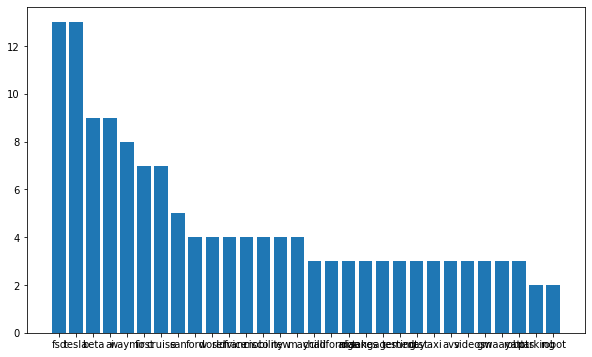

In [67]:
plt.figure(figsize = (10,6))
plt.bar(top_AV_words, top_AV_word_counts)

In [68]:
font_path = "/Users/apple/Desktop/Roboto/Roboto-Light.ttf" 

<function matplotlib.pyplot.show(close=None, block=None)>

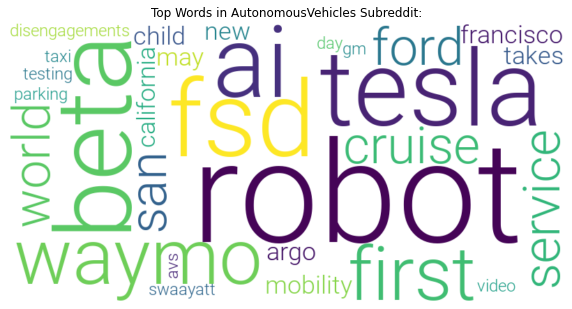

In [69]:
wordcloudAV = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(top_AV_words))

plt.figure(figsize=(10,6))
plt.imshow(wordcloudAV, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top Words in AutonomousVehicles Subreddit:')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

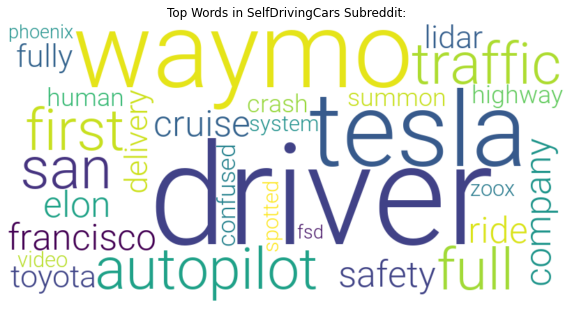

In [70]:
wordcloudSDC = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(top_SDC_words))

plt.figure(figsize=(10,6))
plt.imshow(wordcloudSDC, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top Words in SelfDrivingCars Subreddit:')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

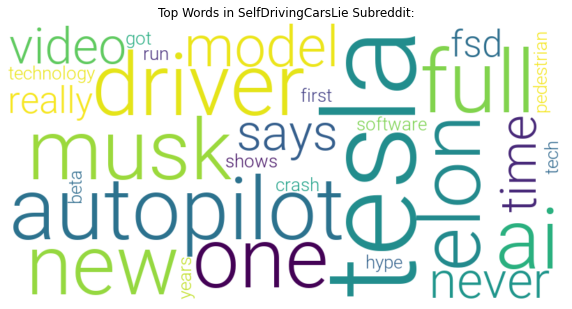

In [71]:
wordcloudSDCL = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(top_SDCL_words))
plt.figure(figsize=(10,6))
plt.imshow(wordcloudSDCL, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top Words in SelfDrivingCarsLie Subreddit:')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

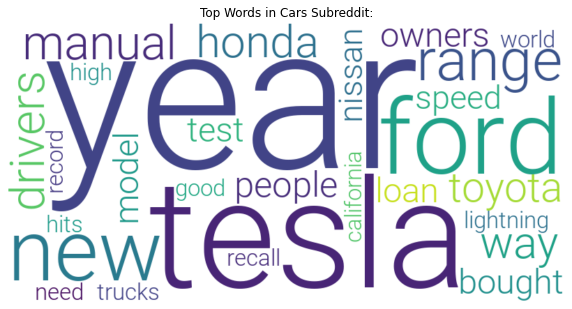

In [72]:
wordcloudcars = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(top_cars_words))
plt.figure(figsize=(10,6))
plt.imshow(wordcloudcars, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top Words in Cars Subreddit:')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

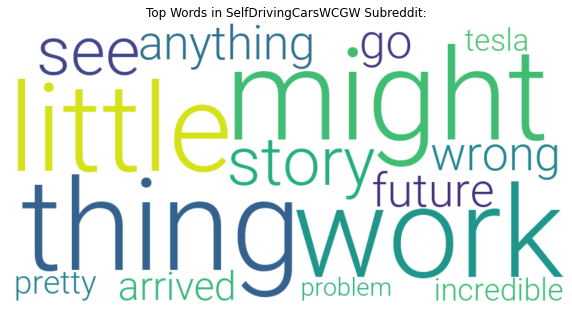

In [73]:
wordcloudWCGW = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(top_WCGW_words))
plt.figure(figsize=(10,6))
plt.imshow(wordcloudWCGW, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top Words in SelfDrivingCarsWCGW Subreddit:')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

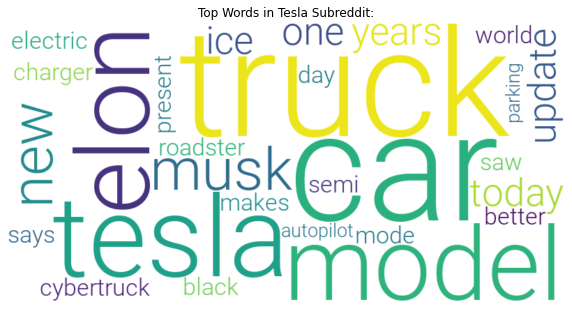

In [74]:
wordcloudtesla = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(top_tesla_words))

plt.figure(figsize=(10,6))
plt.imshow(wordcloudtesla, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top Words in Tesla Subreddit:')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

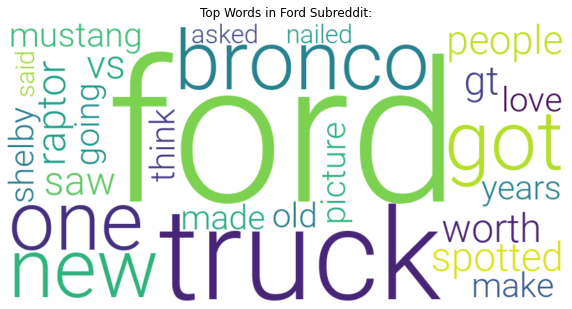

In [75]:
wordcloudford = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(top_ford_words))

plt.figure(figsize=(10,6))
plt.imshow(wordcloudford, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top Words in Ford Subreddit:')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

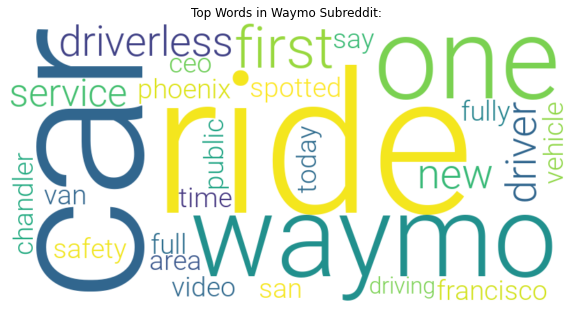

In [76]:
wordcloudwaymo = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(top_waymo_words))

plt.figure(figsize=(10,6))
plt.imshow(wordcloudwaymo, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top Words in Waymo Subreddit:')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

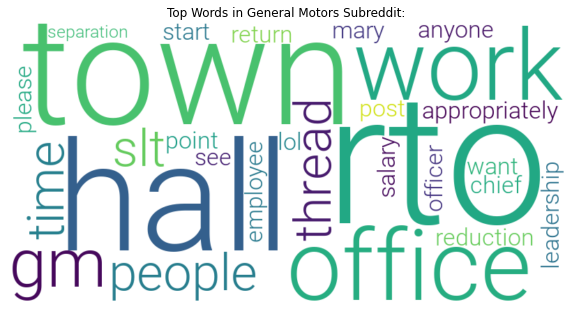

In [77]:
wordcloudgm = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(top_gm_words))

plt.figure(figsize=(10,6))
plt.imshow(wordcloudgm, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top Words in General Motors Subreddit:')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

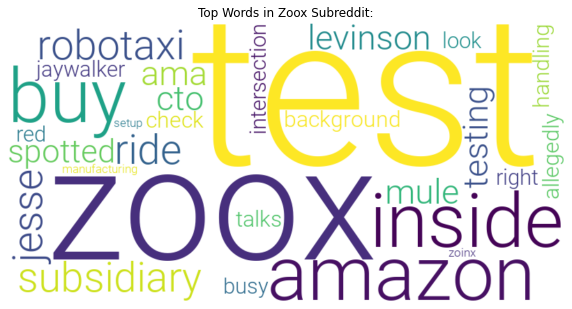

In [78]:
wordcloudzoox = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(top_zoox_words))

plt.figure(figsize=(10,6))
plt.imshow(wordcloudzoox, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top Words in Zoox Subreddit:')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

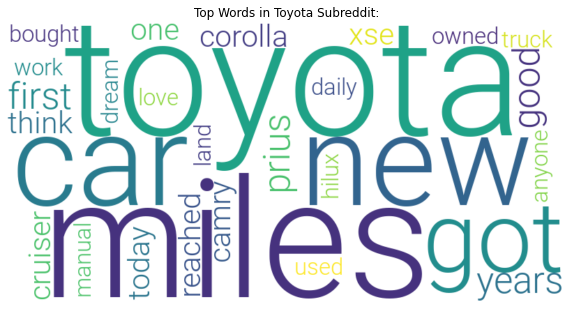

In [79]:
wordcloudtoy = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(top_toy_words))

plt.figure(figsize=(10,6))
plt.imshow(wordcloudtoy, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top Words in Toyota Subreddit:')
plt.show